### Data

In [94]:
import pandas as pd
import numpy as np
import re
import statistics
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv('./input/data.csv', sep=' ',index_col=False,header=None,
                      names=['Date','Time','Sensor','Measurement'])
display(df_raw.head(),df_raw.shape,df_raw.dtypes)

,Date,Time,Sensor,Measurement
0,2010-03-31,00:04:46.08,T001,15.5
1,2010-03-31,00:09:48.55,T001,15
2,2010-03-31,00:09:48.60,T003,14.5
3,2010-03-31,00:14:51.03,T001,14.5
4,2010-03-31,00:14:51.08,T003,14


(1269265, 4)

Date           object
Time           object
Sensor         object
Measurement    object
dtype: object

In [3]:
df_sensors = df_raw.copy()

In [4]:
def mili_to_seconds(miliseconds):
    if len(miliseconds) >= 9:
        miliseconds = re.sub(r':\d\d.\d+$','',miliseconds)
    elif len(miliseconds) == 8:
        miliseconds = re.sub(r':\d\d+$','',miliseconds)    
    elif len(miliseconds) == 2:
        miliseconds = miliseconds+':00'    
    return miliseconds

In [5]:
df_sensors['Time'] = df_sensors['Time'].apply(mili_to_seconds)

In [6]:
df_sensors['DateTime'] = df_sensors['Date'] + ' ' + df_sensors['Time']

In [7]:
df_sensors['DateTime'] = pd.to_datetime(df_sensors['DateTime'])
#df_sensors['Time'] = pd.to_datetime(df_sensors['Time'],format='%H:%M:%S')
#df_sensors['DayWeek'] = df_sensors['DateTime'].dt.dayofweek
df_sensors = df_sensors.drop(['Date', 'Time'], axis=1)

In [8]:
display(df_sensors.head(10),df_sensors.shape,df_sensors.dtypes)

,Sensor,Measurement,DateTime
0,T001,15.5,2010-03-31 00:04:00
1,T001,15,2010-03-31 00:09:00
2,T003,14.5,2010-03-31 00:09:00
3,T001,14.5,2010-03-31 00:14:00
4,T003,14,2010-03-31 00:14:00
5,M001,ON,2010-03-31 00:16:00
6,M001,OFF,2010-03-31 00:17:00
7,T003,13.5,2010-03-31 00:24:00
8,T001,14,2010-03-31 00:40:00
9,T003,13,2010-03-31 00:55:00


(1269265, 3)

Sensor                 object
Measurement            object
DateTime       datetime64[ns]
dtype: object

In [9]:
s_motion = ['M001','M002','M003','M004','M005','M006','M007','M008','M009','M010','M011','M012','M013',
            'M014','M015','M016','M017','M018','M019','M020','M021','M022','M023','M024','M025','M026',
            'M027','M028','M029']

s_temp = ['T001','T002','T003']

s_doors = ['D001','D002','D003']

s_medicine = ['I001']

s_power = ['P001']

In [10]:
def data_sensors(df_input,sensor):
    df_stype = df_input[df_input['Sensor'].isin(sensor)]
    return df_stype

## Sensores de Movimiento

In [11]:
df_M001 = data_sensors(df_sensors,['M001']).reset_index(drop=True)
df_M002 = data_sensors(df_sensors,['M002']).reset_index(drop=True)
df_M003 = data_sensors(df_sensors,['M003']).reset_index(drop=True)
df_M004 = data_sensors(df_sensors,['M004']).reset_index(drop=True)
df_M005 = data_sensors(df_sensors,['M005']).reset_index(drop=True)
df_M006 = data_sensors(df_sensors,['M006']).reset_index(drop=True)
df_M007 = data_sensors(df_sensors,['M007']).reset_index(drop=True)
df_M008 = data_sensors(df_sensors,['M008']).reset_index(drop=True)
df_M009 = data_sensors(df_sensors,['M009']).reset_index(drop=True)
df_M010 = data_sensors(df_sensors,['M010']).reset_index(drop=True)
df_M011 = data_sensors(df_sensors,['M011']).reset_index(drop=True)
df_M012 = data_sensors(df_sensors,['M012']).reset_index(drop=True)
df_M013 = data_sensors(df_sensors,['M013']).reset_index(drop=True)
df_M014 = data_sensors(df_sensors,['M014']).reset_index(drop=True)
df_M015 = data_sensors(df_sensors,['M015']).reset_index(drop=True)
df_M016 = data_sensors(df_sensors,['M016']).reset_index(drop=True)
df_M017 = data_sensors(df_sensors,['M017']).reset_index(drop=True)
df_M018 = data_sensors(df_sensors,['M018']).reset_index(drop=True)
df_M019 = data_sensors(df_sensors,['M019']).reset_index(drop=True)
df_M020 = data_sensors(df_sensors,['M020']).reset_index(drop=True)
df_M021 = data_sensors(df_sensors,['M021']).reset_index(drop=True)
df_M022 = data_sensors(df_sensors,['M022']).reset_index(drop=True)
df_M023 = data_sensors(df_sensors,['M023']).reset_index(drop=True)
df_M024 = data_sensors(df_sensors,['M024']).reset_index(drop=True)
df_M025 = data_sensors(df_sensors,['M025']).reset_index(drop=True)
df_M026 = data_sensors(df_sensors,['M026']).reset_index(drop=True)
df_M027 = data_sensors(df_sensors,['M027']).reset_index(drop=True)
df_M028 = data_sensors(df_sensors,['M028']).reset_index(drop=True)
df_M029 = data_sensors(df_sensors,['M029']).reset_index(drop=True)

In [12]:
def cat_data(value):
    if value == 'ON':
        value = 1
    elif value == 'OFF':
        value = 0
    return value

In [13]:
df_M001['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M002['Measurement'] = df_M002['Measurement'].apply(cat_data)
df_M003['Measurement'] = df_M003['Measurement'].apply(cat_data)
df_M004['Measurement'] = df_M004['Measurement'].apply(cat_data)
df_M005['Measurement'] = df_M005['Measurement'].apply(cat_data)
df_M006['Measurement'] = df_M006['Measurement'].apply(cat_data)
df_M007['Measurement'] = df_M007['Measurement'].apply(cat_data)
df_M008['Measurement'] = df_M008['Measurement'].apply(cat_data)
df_M009['Measurement'] = df_M009['Measurement'].apply(cat_data)
df_M010['Measurement'] = df_M010['Measurement'].apply(cat_data)
df_M011['Measurement'] = df_M011['Measurement'].apply(cat_data)
df_M012['Measurement'] = df_M012['Measurement'].apply(cat_data)
df_M013['Measurement'] = df_M013['Measurement'].apply(cat_data)
df_M014['Measurement'] = df_M014['Measurement'].apply(cat_data)
df_M015['Measurement'] = df_M015['Measurement'].apply(cat_data)
df_M016['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M017['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M018['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M019['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M020['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M021['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M022['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M023['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M024['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M025['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M026['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M027['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M028['Measurement'] = df_M001['Measurement'].apply(cat_data)
df_M029['Measurement'] = df_M001['Measurement'].apply(cat_data)

In [14]:
df_M001 = df_M001.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M002 = df_M002.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M003 = df_M003.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M004 = df_M004.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M005 = df_M005.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M006 = df_M006.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M007 = df_M007.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M008 = df_M008.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M009 = df_M009.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M010 = df_M010.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M011 = df_M011.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M012 = df_M012.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M013 = df_M013.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M014 = df_M014.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M015 = df_M015.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M016 = df_M016.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M017 = df_M017.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M018 = df_M018.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M019 = df_M019.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M020 = df_M020.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M021 = df_M021.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M022 = df_M022.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M023 = df_M023.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M024 = df_M024.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M025 = df_M025.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M026 = df_M026.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M027 = df_M027.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M028 = df_M028.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_M029 = df_M029.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})

In [15]:
df_M001.columns=['DateTime','M001']
df_M002.columns=['DateTime','M002']
df_M003.columns=['DateTime','M003']
df_M004.columns=['DateTime','M004']
df_M005.columns=['DateTime','M005']
df_M006.columns=['DateTime','M006']
df_M007.columns=['DateTime','M007']
df_M008.columns=['DateTime','M008']
df_M009.columns=['DateTime','M009']
df_M010.columns=['DateTime','M010']
df_M011.columns=['DateTime','M011']
df_M012.columns=['DateTime','M012']
df_M013.columns=['DateTime','M013']
df_M014.columns=['DateTime','M014']
df_M015.columns=['DateTime','M015']
df_M016.columns=['DateTime','M016']
df_M017.columns=['DateTime','M017']
df_M018.columns=['DateTime','M018']
df_M019.columns=['DateTime','M019']
df_M020.columns=['DateTime','M020']
df_M021.columns=['DateTime','M021']
df_M022.columns=['DateTime','M022']
df_M023.columns=['DateTime','M023']
df_M024.columns=['DateTime','M024']
df_M025.columns=['DateTime','M025']
df_M026.columns=['DateTime','M026']
df_M027.columns=['DateTime','M027']
df_M028.columns=['DateTime','M028']
df_M029.columns=['DateTime','M029']

## Sensores de Temperatura y Potencia

In [16]:
df_T001 = data_sensors(df_sensors,['T001']).reset_index(drop=True)
df_T002 = data_sensors(df_sensors,['T002']).reset_index(drop=True)
df_T003 = data_sensors(df_sensors,['T003']).reset_index(drop=True)
df_P001 = data_sensors(df_sensors,['P001']).reset_index(drop=True)

In [17]:
def num_data(value):
    return float(value)

In [18]:
df_T001['Measurement'] = df_T001['Measurement'].apply(num_data)
df_T002['Measurement'] = df_T002['Measurement'].apply(num_data)
df_T003['Measurement'] = df_T003['Measurement'].apply(num_data)
df_P001['Measurement'] = df_P001['Measurement'].apply(num_data)

In [19]:
df_T001 = df_T001.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_T002 = df_T002.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_T003 = df_T002.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_P001 = df_P001.groupby('DateTime',as_index=False).agg({"Measurement":"sum"})

In [20]:
df_T001.columns=['DateTime','T001']
df_T002.columns=['DateTime','T002']
df_T003.columns=['DateTime','T003']
df_P001.columns=['DateTime','P001']

## Sensores en Puertas

In [21]:
df_D001 = data_sensors(df_sensors,['D001']).reset_index(drop=True)
df_D002 = data_sensors(df_sensors,['D002']).reset_index(drop=True)
df_D003 = data_sensors(df_sensors,['D003']).reset_index(drop=True)

In [22]:
def door_data(value):
    if value == 'OPEN':
        value = 1
    elif value == 'CLOSE':
        value = 0
    return value

In [23]:
df_D001['Measurement'] = df_D001['Measurement'].apply(door_data)
df_D002['Measurement'] = df_D002['Measurement'].apply(door_data)
df_D003['Measurement'] = df_D003['Measurement'].apply(door_data)

In [24]:
df_D001 = df_D001.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_D002 = df_D002.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})
df_D003 = df_D003.groupby('DateTime',as_index=False).agg({"Measurement":"mean"})

In [25]:
df_D001.columns=['DateTime','D001']
df_D002.columns=['DateTime','D002']
df_D003.columns=['DateTime','D003']

In [78]:
for df in df_all:
    display(df.head(2),df.tail(2),df.shape,df.dtypes,df.isnull().sum())

,DateTime,M001
0,2010-03-31 00:16:00,1.0
1,2010-03-31 00:17:00,0.0


,DateTime,M001
16743,2010-09-06 21:54:00,0.5
16744,2010-09-06 23:56:00,0.5


(16745, 2)

DateTime    datetime64[ns]
M001               float64
dtype: object

DateTime    0
M001        0
dtype: int64

,DateTime,M002
0,2010-03-31 06:18:00,0.5
1,2010-03-31 06:19:00,0.5


,DateTime,M002
7821,2010-09-06 19:50:00,0.5
7822,2010-09-06 20:05:00,0.5


(7823, 2)

DateTime    datetime64[ns]
M002               float64
dtype: object

DateTime    0
M002        0
dtype: int64

,DateTime,M003
0,2010-03-31 04:52:00,0.5
1,2010-03-31 05:31:00,0.5


,DateTime,M003
10437,2010-09-06 21:36:00,0.5
10438,2010-09-06 21:37:00,0.5


(10439, 2)

DateTime    datetime64[ns]
M003               float64
dtype: object

DateTime    0
M003        0
dtype: int64

,DateTime,M004
0,2010-03-31 04:52:00,1.0
1,2010-03-31 04:53:00,0.0


,DateTime,M004
5032,2010-09-06 20:04:00,0.571429
5033,2010-09-06 20:05:00,0.333333


(5034, 2)

DateTime    datetime64[ns]
M004               float64
dtype: object

DateTime    0
M004        0
dtype: int64

,DateTime,M005
0,2010-03-31 05:53:00,0.5
1,2010-04-01 11:15:00,0.5


,DateTime,M005
13724,2010-09-06 19:32:00,0.0
13725,2010-09-06 20:04:00,0.5


(13726, 2)

DateTime    datetime64[ns]
M005               float64
dtype: object

DateTime    0
M005        0
dtype: int64

,DateTime,M006
0,2010-03-31 17:31:00,0.500000
1,2010-03-31 17:32:00,0.571429


,DateTime,M006
16694,2010-09-06 21:37:00,1.0
16695,2010-09-06 21:38:00,0.0


(16696, 2)

DateTime    datetime64[ns]
M006               float64
dtype: object

DateTime    0
M006        0
dtype: int64

,DateTime,M007
0,2010-03-31 04:52:00,0.5
1,2010-03-31 05:46:00,0.5


,DateTime,M007
14710,2010-09-06 21:36:00,0.5
14711,2010-09-06 21:37:00,0.5


(14712, 2)

DateTime    datetime64[ns]
M007               float64
dtype: object

DateTime    0
M007        0
dtype: int64

,DateTime,M008
0,2010-03-31 17:23:00,0.5
1,2010-03-31 17:30:00,1.0


,DateTime,M008
15091,2010-09-06 21:36:00,0.5
15092,2010-09-06 21:37:00,0.5


(15093, 2)

DateTime    datetime64[ns]
M008               float64
dtype: object

DateTime    0
M008        0
dtype: int64

,DateTime,M009
0,2010-03-31 04:52:00,0.500000
1,2010-03-31 05:46:00,0.666667


,DateTime,M009
16866,2010-09-06 21:36:00,0.5
16867,2010-09-06 21:37:00,0.5


(16868, 2)

DateTime    datetime64[ns]
M009               float64
dtype: object

DateTime    0
M009        0
dtype: int64

,DateTime,M010
0,2010-03-31 04:39:00,0.5
1,2010-03-31 05:31:00,0.5


,DateTime,M010
11312,2010-09-06 21:36:00,0.5
11313,2010-09-06 21:37:00,0.5


(11314, 2)

DateTime    datetime64[ns]
M010               float64
dtype: object

DateTime    0
M010        0
dtype: int64

,DateTime,M011
0,2010-03-31 04:43:00,0.5
1,2010-03-31 04:48:00,0.5


,DateTime,M011
13826,2010-09-06 21:36:00,0.5
13827,2010-09-06 21:37:00,0.5


(13828, 2)

DateTime    datetime64[ns]
M011               float64
dtype: object

DateTime    0
M011        0
dtype: int64

,DateTime,M012
0,2010-03-31 05:49:00,0.5
1,2010-03-31 17:31:00,0.6


,DateTime,M012
7779,2010-09-06 20:05:00,0.5
7780,2010-09-06 20:25:00,0.5


(7781, 2)

DateTime    datetime64[ns]
M012               float64
dtype: object

DateTime    0
M012        0
dtype: int64

,DateTime,M013
0,2010-03-31 04:49:00,0.5
1,2010-03-31 04:50:00,0.6


,DateTime,M013
2314,2010-09-06 17:51:00,0.5
2315,2010-09-06 17:52:00,0.5


(2316, 2)

DateTime    datetime64[ns]
M013               float64
dtype: object

DateTime    0
M013        0
dtype: int64

,DateTime,M014
0,2010-04-14 16:41:00,0.5
1,2010-04-17 13:18:00,0.5


,DateTime,M014
857,2010-09-05 08:01:00,0.5
858,2010-09-06 11:23:00,0.5


(859, 2)

DateTime    datetime64[ns]
M014               float64
dtype: object

DateTime    0
M014        0
dtype: int64

,DateTime,M015
0,2010-04-17 13:18:00,0.5
1,2010-04-17 13:19:00,0.5


,DateTime,M015
805,2010-09-06 11:23:00,0.5
806,2010-09-06 20:00:00,0.5


(807, 2)

DateTime    datetime64[ns]
M015               float64
dtype: object

DateTime    0
M015        0
dtype: int64

,DateTime,M016
0,2010-04-17 13:20:00,0.5
1,2010-04-23 12:03:00,0.5


,DateTime,M016
821,2010-09-04 20:12:00,0.400000
822,2010-09-04 20:13:00,0.666667


(823, 2)

DateTime    datetime64[ns]
M016               float64
dtype: object

DateTime    0
M016        0
dtype: int64

,DateTime,M017
0,2010-03-31 05:44:00,0.5
1,2010-03-31 06:24:00,0.5


,DateTime,M017
7884,2010-09-06 21:36:00,0.5
7885,2010-09-06 21:37:00,0.5


(7886, 2)

DateTime    datetime64[ns]
M017               float64
dtype: object

DateTime    0
M017        0
dtype: int64

,DateTime,M018
0,2010-03-31 05:44:00,0.5
1,2010-03-31 05:45:00,0.5


,DateTime,M018
8308,2010-09-06 21:36:00,0.5
8309,2010-09-06 21:37:00,0.5


(8310, 2)

DateTime    datetime64[ns]
M018               float64
dtype: object

DateTime    0
M018        0
dtype: int64

,DateTime,M019
0,2010-03-31 05:44:00,1.0
1,2010-03-31 05:45:00,0.0


,DateTime,M019
8311,2010-09-06 21:37:00,1.0
8312,2010-09-06 21:38:00,0.0


(8313, 2)

DateTime    datetime64[ns]
M019               float64
dtype: object

DateTime    0
M019        0
dtype: int64

,DateTime,M020
0,2010-04-01 10:30:00,0.6
1,2010-04-01 10:31:00,0.5


,DateTime,M020
3051,2010-09-06 13:47:00,0.333333
3052,2010-09-06 19:55:00,0.500000


(3053, 2)

DateTime    datetime64[ns]
M020               float64
dtype: object

DateTime    0
M020        0
dtype: int64

,DateTime,M021
0,2010-04-06 19:47:00,0.5
1,2010-04-14 16:42:00,0.5


,DateTime,M021
2671,2010-09-06 19:54:00,1.0
2672,2010-09-06 19:55:00,0.0


(2673, 2)

DateTime    datetime64[ns]
M021               float64
dtype: object

DateTime    0
M021        0
dtype: int64

,DateTime,M022
0,2010-04-01 10:30:00,0.571429
1,2010-04-01 10:31:00,0.500000


,DateTime,M022
3883,2010-09-06 19:54:00,0.5
3884,2010-09-06 19:55:00,0.5


(3885, 2)

DateTime    datetime64[ns]
M022               float64
dtype: object

DateTime    0
M022        0
dtype: int64

,DateTime,M023
0,2010-04-07 21:15:00,0.5
1,2010-04-14 16:42:00,0.5


,DateTime,M023
849,2010-09-05 08:17:00,0.6
850,2010-09-05 20:22:00,0.5


(851, 2)

DateTime    datetime64[ns]
M023               float64
dtype: object

DateTime    0
M023        0
dtype: int64

,DateTime,M024
0,2010-04-23 09:57:00,0.5
1,2010-04-23 10:07:00,0.5


,DateTime,M024
9285,2010-09-06 21:36:00,0.5
9286,2010-09-06 21:38:00,0.5


(9287, 2)

DateTime    datetime64[ns]
M024               float64
dtype: object

DateTime    0
M024        0
dtype: int64

,DateTime,M025
0,2010-04-01 10:32:00,0.5
1,2010-04-14 16:42:00,0.5


,DateTime,M025
7557,2010-09-06 21:37:00,1.0
7558,2010-09-06 21:38:00,0.0


(7559, 2)

DateTime    datetime64[ns]
M025               float64
dtype: object

DateTime    0
M025        0
dtype: int64

,DateTime,M026
0,2010-04-23 09:59:00,0.500000
1,2010-04-23 10:33:00,0.666667


,DateTime,M026
7750,2010-09-06 21:38:00,0.5
7751,2010-09-06 21:45:00,0.5


(7752, 2)

DateTime    datetime64[ns]
M026               float64
dtype: object

DateTime    0
M026        0
dtype: int64

,DateTime,M027
0,2010-04-23 09:57:00,0.5
1,2010-04-23 09:58:00,0.5


,DateTime,M027
7300,2010-09-06 20:20:00,1.0
7301,2010-09-06 21:13:00,0.5


(7302, 2)

DateTime    datetime64[ns]
M027               float64
dtype: object

DateTime    0
M027        0
dtype: int64

,DateTime,M028
0,2010-04-23 09:57:00,0.5
1,2010-04-23 10:14:00,0.5


,DateTime,M028
3480,2010-09-06 21:59:00,0.5
3481,2010-09-06 22:22:00,0.5


(3482, 2)

DateTime    datetime64[ns]
M028               float64
dtype: object

DateTime    0
M028        0
dtype: int64

,DateTime,M029
0,2010-04-23 10:14:00,1.000000
1,2010-04-23 10:15:00,0.333333


,DateTime,M029
6169,2010-09-06 20:14:00,0.5
6170,2010-09-06 20:19:00,0.5


(6171, 2)

DateTime    datetime64[ns]
M029               float64
dtype: object

DateTime    0
M029        0
dtype: int64

,DateTime,T001
0,2010-03-31 00:04:00,15.5
1,2010-03-31 00:09:00,15.0


,DateTime,T001
6806,2010-09-06 22:24:00,22.0
6807,2010-09-06 23:14:00,21.5


(6808, 2)

DateTime    datetime64[ns]
T001               float64
dtype: object

DateTime    0
T001        0
dtype: int64

,DateTime,T002
0,2010-03-31 01:20:00,14.5
1,2010-03-31 01:45:00,15.0


,DateTime,T002
4561,2010-09-06 22:14:00,23.0
4562,2010-09-06 23:04:00,22.5


(4563, 2)

DateTime    datetime64[ns]
T002               float64
dtype: object

DateTime    0
T002        0
dtype: int64

,DateTime,T003
0,2010-03-31 01:20:00,14.5
1,2010-03-31 01:45:00,15.0


,DateTime,T003
4561,2010-09-06 22:14:00,23.0
4562,2010-09-06 23:04:00,22.5


(4563, 2)

DateTime    datetime64[ns]
T003               float64
dtype: object

DateTime    0
T003        0
dtype: int64

,DateTime,P001
0,2010-05-11 12:10:00,0.71
1,2010-05-11 12:11:00,0.45


,DateTime,P001
40368,2010-09-06 23:58:00,2.84
40369,2010-09-06 23:59:00,2.41


(40370, 2)

DateTime    datetime64[ns]
P001               float64
dtype: object

DateTime    0
P001        0
dtype: int64

,DateTime,D001
0,2010-03-31 17:30:00,1.0
1,2010-03-31 17:31:00,0.0


,DateTime,D001
3046,2010-09-06 21:36:00,1.0
3047,2010-09-06 21:37:00,0.0


(3048, 2)

DateTime    datetime64[ns]
D001               float64
dtype: object

DateTime    0
D001        0
dtype: int64

,DateTime,D002
0,2010-05-11 12:09:00,1.0
1,2010-06-02 10:06:00,1.0


,DateTime,D002
178,2010-09-04 15:26:00,0.500000
179,2010-09-06 15:27:00,0.333333


(180, 2)

DateTime    datetime64[ns]
D002               float64
dtype: object

DateTime    0
D002        0
dtype: int64

,DateTime,D003
0,2010-04-01 10:30:00,1.0
1,2010-04-01 10:32:00,0.0


,DateTime,D003
366,2010-09-05 07:09:00,0.5
367,2010-09-05 07:20:00,1.0


(368, 2)

DateTime    datetime64[ns]
D003               float64
dtype: object

DateTime    0
D003        0
dtype: int64

In [86]:
df_P001.DateTime.unique()

array([15.5, 15. , 14.5, 14. , 13.5, 16. , 13. , 12.5, 16.5, 17. , 17.5,
       18. , 18.5, 19. , 19.5, 12. , 11.5, 11. , 10.5, 10. , 20.5, 20. ,
       21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ,
       26.5, 27. , 27.5,  0. , 28. , 28.5, 29. ])

## Dataframe Definitivo

In [87]:
time_ini = pd.date_range('2010-03-31 00:04:00', periods=230396, freq='1min')
#time_fin = pd.date_range('2010-03-31 00:04:59', periods=230396, freq='1min')
#df_time_ini = pd.DataFrame({'TimeIni':time_ini})
#df_time_fin = pd.DataFrame({'TimeFin':time_fin})
df_full = pd.DataFrame({'DateTime':time_ini})
#df_full = pd.concat([df_time_ini, df_time_fin], axis=1, sort=False)
#df_full = pd.DataFrame({'TimeGap': np.arange(1,230397)},index=time_gap)
df_full['DayWeek'] = df_full['DateTime'].dt.dayofweek
display(df_full.head(),df_full.shape)

,DateTime,DayWeek
0,2010-03-31 00:04:00,2
1,2010-03-31 00:05:00,2
2,2010-03-31 00:06:00,2
3,2010-03-31 00:07:00,2
4,2010-03-31 00:08:00,2


(230396, 2)

In [88]:
def merge_df(df_main,df_list):
    for df in df_list:
        df_main = pd.merge(df_main,df,how='left',on=['DateTime'])
    return df_main

In [89]:
df_all = [df_M001,df_M002,df_M003,df_M004,df_M005,df_M006,df_M007,df_M008,df_M009,df_M010,df_M011,df_M012,
         df_M013,df_M014,df_M015,df_M016,df_M017,df_M018,df_M019,df_M020,df_M021,df_M022,df_M023,df_M024,
         df_M025,df_M026,df_M027,df_M028,df_M029,df_T001,df_T002,df_T003,df_P001,df_D001,df_D002,df_D003]
df = merge_df(df_full,df_all).fillna(0)

In [90]:
df.shape

(230396, 38)

In [92]:
df

,DateTime,DayWeek,M001,M002,M003,M004,M005,M006,M007,M008,...,M027,M028,M029,T001,T002,T003,P001,D001,D002,D003
0,2010-03-31 00:04:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.5,0.0,0.0,0.00,0.0,0.0,0.0
1,2010-03-31 00:05:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,2010-03-31 00:06:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,2010-03-31 00:07:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,2010-03-31 00:08:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
5,2010-03-31 00:09:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,0.0,0.0,0.00,0.0,0.0,0.0
6,2010-03-31 00:10:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
7,2010-03-31 00:11:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
8,2010-03-31 00:12:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
9,2010-03-31 00:13:00,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [97]:
df.dtypes

DateTime    datetime64[ns]
DayWeek              int64
M001               float64
M002               float64
M003               float64
M004               float64
M005               float64
M006               float64
M007               float64
M008               float64
M009               float64
M010               float64
M011               float64
M012               float64
M013               float64
M014               float64
M015               float64
M016               float64
M017               float64
M018               float64
M019               float64
M020               float64
M021               float64
M022               float64
M023               float64
M024               float64
M025               float64
M026               float64
M027               float64
M028               float64
M029               float64
T001               float64
T002               float64
T003               float64
P001               float64
D001               float64
D002               float64
D

AttributeError: module 'seaborn' has no attribute 'set_xlim'

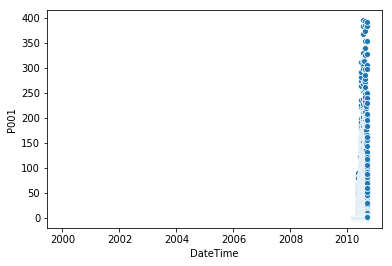

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x="DateTime", y="P001", data=df)
sns.set_xlim(2010, 2011)

In [ ]:
values = []
for e in range(df_P001.shape[0]):
    if df_full.TimeIni[0] <= df_P001.DateTime[e] <= df_full.TimeFin[0]:
        values.append(df_P001.Measurement[e])
    else:
        values.append(0)
value = sum(values)

In [ ]:
value

In [ ]:
df_P001.shape[0]*df_full.shape[0]

In [ ]:
%%time
values = []
new_serie = []
for i in range(10):
    for e in range(df_T001.shape[0]):
        if df_full.TimeIni[i] <= df_T001.DateTime[e] <= df_full.TimeFin[i]:
            values.append(df_T001.Measurement[e])
    value = statistics.mean(values)
    print(values)
    new_serie.append(value)      

In [ ]:
new_serie

In [ ]:
def serie_sum(dataframe):
    values = []
    new_serie = []
    for i in range(df_full.shape[0]):
        for e in range(df_P001.shape[0]):
            if df_full.TimeIni[i] <= df_P001.DateTime[e] <= df_full.TimeFin[i]:
                values.append(df_P001.Measurement[e])
            else:
                values.append(0)
    value = sum(values)
    new_serie.append(value)      
    return new_serie

In [ ]:
def serie_mode(dataframe):
    values = []
    new_serie = []
    for i in range(df_full.shape[0]):
        for e in range(df_P001.shape[0]):
            if df_full.TimeIni[i] <= df_P001.DateTime[e] <= df_full.TimeFin[i]:
                values.append(df_P001.Measurement[e])
            else:
                values.append(0)
    value = statistics.mode(values)
    new_serie.append(value)      
    return new_serie

In [ ]:
df_motion = df_sensors[df_sensors.Sensor.isin(s_motion)]
display(df_motion.shape,df_motion.head(),df_motion.Measurement.unique())

In [ ]:
df_temp = df_sensors[df_sensors.Sensor.isin(s_temp)]
display(df_temp.shape,df_temp.head(),df_temp.Measurement.unique())

In [ ]:
df_doors = df_sensors[df_sensors.Sensor.isin(s_doors)]
display(df_doors.shape,df_doors.head(),df_doors.Measurement.unique())

In [ ]:
df_medicine = df_sensors[df_sensors.Sensor.isin(s_medicine)]
display(df_medicine.shape,df_medicine.head(),df_medicine.Measurement.unique())

In [ ]:
df_power = df_sensors[df_sensors.Sensor.isin(s_power)]
display(df_power.shape,df_power.head(),df_power.Measurement.min(),df_power.Measurement.max())

In [ ]:
#sensors.Measurement.unique()

In [ ]:
sensors.Sensor.value_counts()

In [ ]:
sensors.dtypes